In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('notebook\data\StudentsPerformance.csv')

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape


(1000, 8)

In [10]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
print("Category in 'Gender' column:",end = " ")
print(df['gender'].unique())

print("Category in 'race/ethnicity' column:",end = " ")
print(df['race/ethnicity'].unique())

print("Category in 'parental level of education' column:",end = " ")
print(df['parental level of education'].unique())

print("Category in 'lunch' column:",end = " ")
print(df['lunch'].unique())

print("Category in 'test preparation course' column:",end = " ")
print(df['test preparation course'].unique())


Category in 'Gender' column: ['female' 'male']
Category in 'race/ethnicity' column: ['group B' 'group C' 'group A' 'group D' 'group E']
Category in 'parental level of education' column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Category in 'lunch' column: ['standard' 'free/reduced']
Category in 'test preparation course' column: ['none' 'completed']


In [20]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype== 'O']

print('we have {} numerical feature :{}'.format(len(numeric_feature),numeric_feature))
print("we have {} categorical feature: {}".format(len(categorical_feature),categorical_feature))


we have 3 numerical feature :['math score', 'reading score', 'writing score']
we have 5 categorical feature: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [21]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()


print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in math: {math_full}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [32]:
reading_less_20= df[df['reading score']<20]['average'].count()
writing_less_20= df[df['writing score']<20]['average'].count()
math_less_20= df[df['math score']<20]['average'].count()

print(f'Number of students with less than 20 in reading is {reading_less_20}')
print(f'Number of students with less than 20 in writing is {writing_less_20}')
print(f'Number of students with less than 20 in math is {math_less_20}')

Number of students with less than 20 in reading is 1
Number of students with less than 20 in writing is 3
Number of students with less than 20 in math is 4


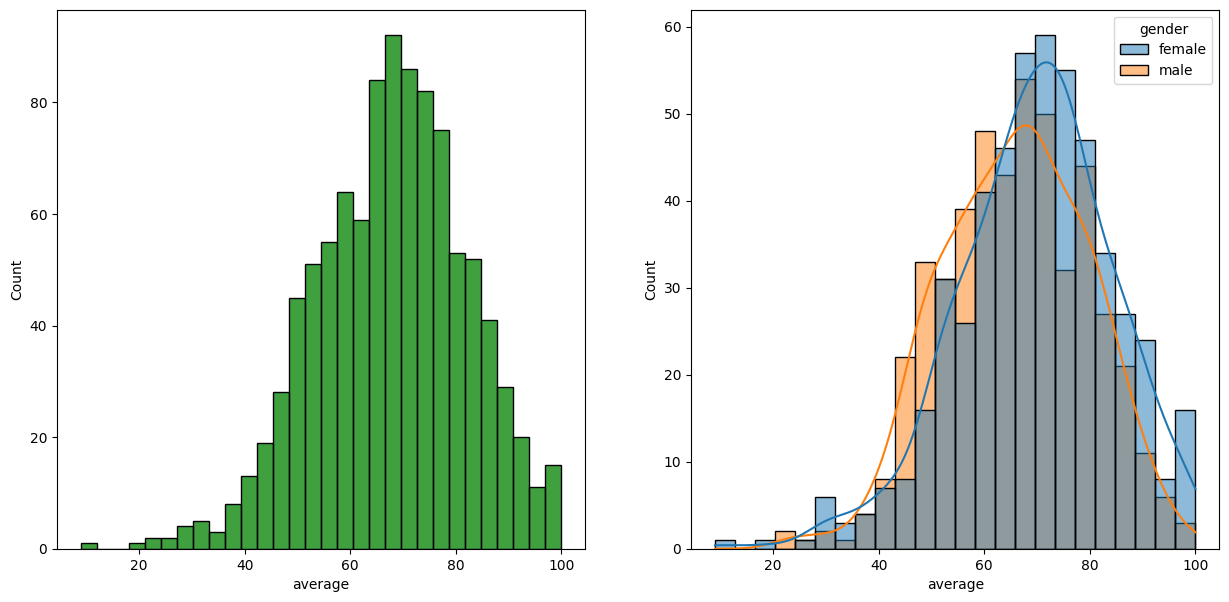

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)  # Remove quotes, use integer
sns.histplot(data=df, x="average", bins=30, color="g")
plt.subplot(122)  # Remove quotes, use integer
sns.histplot(data=df, x="average", kde=True, hue="gender")
plt.show()

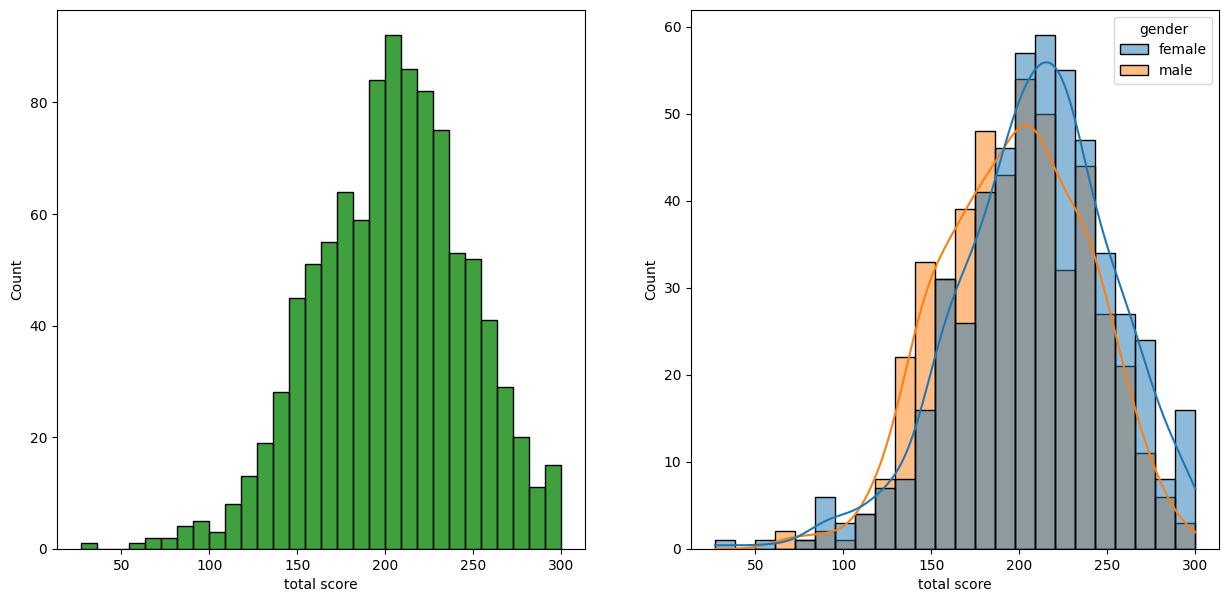

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)  # Remove quotes, use integer
sns.histplot(data=df, x="total score", bins=30, color="g")
plt.subplot(122)  # Remove quotes, use integer
sns.histplot(data=df, x="total score", kde=True, hue="gender")
plt.show()

<Axes: xlabel='average', ylabel='Count'>

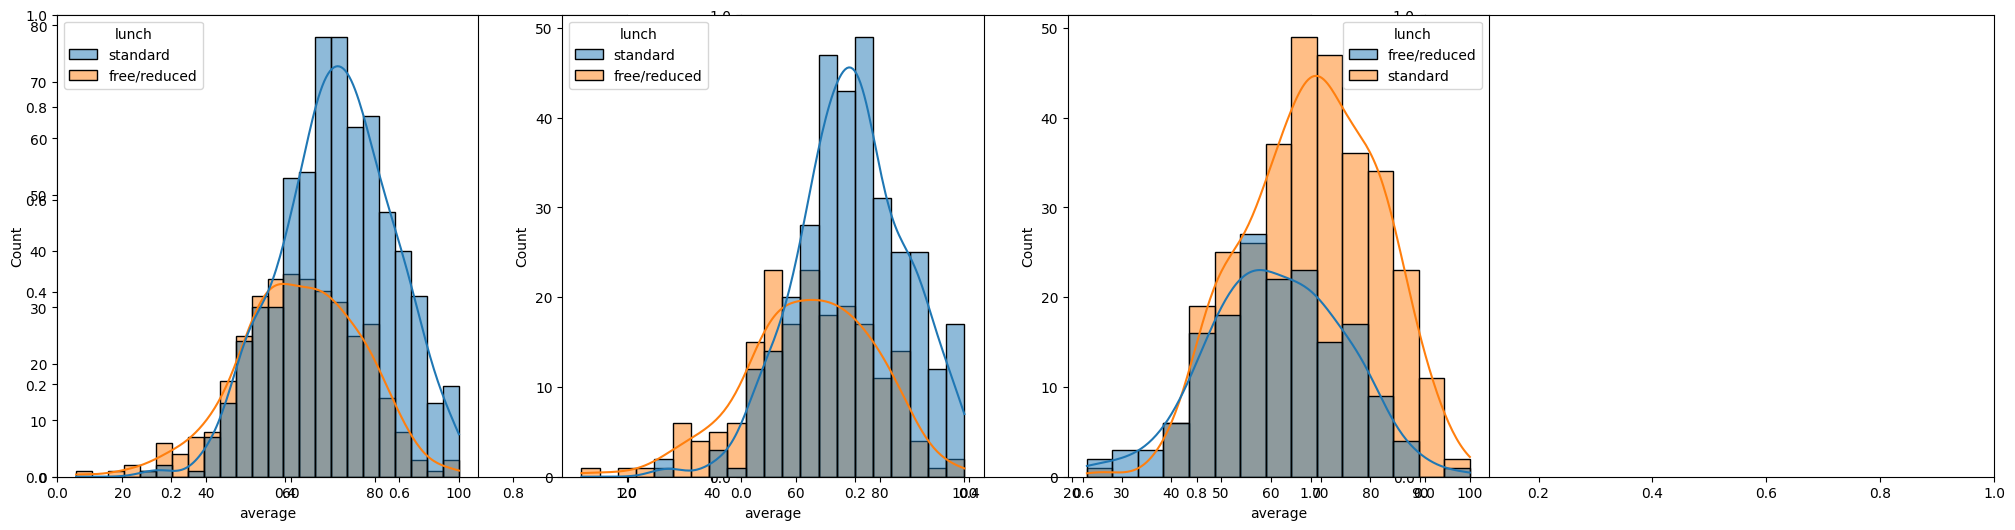

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
